# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

## <font color="darkorange"> Note teoriche
Con il termine **computazione parallela** si intende il suddividere l'esecuzione di un codice su più processori che lavorano contemporaneamente. Questo approccio può offrire numerosi vantaggi.

Se per completare un task computazionale in modo seriale, usando un solo processore, è necessario un tempo $t_1$, allora usando $p$ processori, il tempo potrebbe ridursi a:

$$
t_p = \frac{t_1}{p}
$$
In questo modo, anzichè usare un unico processore, magari molto costoso, è possibile utilizzare più processori meno costosi che lavorano in parallelo. Inoltre, siccome il lavoro viene suddiviso tra più CPU, la memoria richiesta da ciascuno di questi può essere ridotta.

Si definisce **computer parallelo** un insieme di unità computazionali che sono in grado di cooperare e comunicare tra loro, al fine di risolvere rapidamente problemi complessi in modo efficiente. A seconda del set di dati su cui si lavora (singolo-multiplo) e del numero di istruzioni messe in atto (singole-multiple) i computer paralleli vengono definiti in accordo con la classificazione di Flynn:
- **Single Instruction Single Data** - SISD: rappresenta la computazione seriale;
- **Single Instruction Multiple Data** - SIMD: rappresenta la computazione vettoriale;
- **Multiple Instruction Single Data** - MISD: è un SISD evoluto;
- **Multiple Instruction Multiple Data** - MIMD: è la computazione che utilizza più processori.

Inoltre, in base a come è condivisa la memoria, i computer paralleli si possono suddividere in:
- **Symmetric Multi-Processor** (SMP): i processori condividono la stessa memoria centrale (RAM) e le stesse memorie perifiriche (I/O). Ogni processore presenta una cache privata, spesso su più livelli; per questo motivo, serve un meccanismo di coerenza per le cache, un sistema per sincronizzare i dati in caso di modifiche fatte da più processori contemporaneamente. É gestito da un unico sistema operativo che si occupa di schedulare i processi o thread su diversi processori in modo equilibrato.
- **Massively Parallel Processor** (MPP): si tratta di un'architettura con memoria distribuita. É gestita da più nodi indipendenti collegati tra loro da una rete ad alta velocità. Ogni nodo ha un proprio processore, una propria memoria centrale e un proprio sotto-insieme di I/O. Ogni nodo può essere visto come un computer autonomo, e può eventalmente essere munito di SMP.
- **Non-Uniform Memory Access** (NUMA): è simile a un MPP, ma i nodi non sono indipendenti. Ciascun nodo può accedere sia alla propria memoria sia a quella degli altri nodi. Il ritardo di accesso alla memoria non è uniforme: l'accesso alla memoria locale è più veloce, quello alla memoria remota più lento. La macchina è controllata da un unico sistema operativo, ed è utilizzato un opportuno protocollo per mantenere la coerenza tra le cache.

Se la memoria non è condivisa, i processori devono trasmettere i propri dati attraverso una rete di interconnessione tra le varie unità, al fine di accedere ai dati che altri processi hanno trattato. In questo contesto si deve tener conto di **communication overhead** (tempo e risorse sprecate per far comunicare tra loro i  vari processi), **workload unbalance** (il fatto che alcune CPU lavorino più delle altre) e **syncronization** (coordinare i vari processi quando accedono a dati condivisi e devono aspettarsi a vicenda). Per questi motivi, l'esecuzione di un programma in parallelo più essere più lenta rispetto all'esecuzione seriale.

Per studiare le performance di un calcolo parallelo si utilizzano i seguenti parametri:
- **Costo**: $C_p = p \cdot T_p$, dove $p$ è il numero di processori e $T_p$ è il tempo richiesto per seguire un processo con calcolo parallelo con $p$ processori.

- **Speed-up**: $S_p = T_1 / T_p$, dove $T_1$ è il tempo necessario per eseguire il processo con un singolo processore (esecuzione seriale). Nel caso ideale: $S_p = p$ (speed-up lineare).

- **Efficienza**: $E_p = \frac{S_p}{p} = \frac{T_1}{p \cdot T_p}$. Il massimo valore teorico è $E_p = 1$.


Un algoritmo di parallelizzazione deve cercare di massimizzare il prodotto $E_p \cdot S_p$: si cerca di ottenere **il massimo speed-up con la maggiore efficienza possibile**. In generale, aumentare il numero di CPU comporta un incremento della velocità di esecuzione del processo (maggiore speed-up), ma una diminuzione dell’efficienza, poiché un numero crescente di CPU tende a restare inattivo una volta completata la maggior parte dei calcoli.

La **legge di Amdahl** afferma che se anche la frazione seriale $s$ di un problema è piccola, il massimo speed-up che si può ottenere da un numero anche infinito di processi in parallelo è solo $1/s$.

A differenza di Amdahl, la **legge di Gustafson** osserva che man mano che la complessità del problema cresce, aumenta anche la quantità di lavoro parallellizzabile $f$, mentre la parte seriale $s = 1 - f$ tende a diventare trascurabile (e quindi lo speed-up cresce). Quindi, per problemi grandi e realistici, il parallelismo continua a essere vantaggioso.

Nella comunicazione in parallelo, buona parte del tempo è utilizzata per trasmettere i risultati parziali ottenuti dalle singole CPU. Dunque l'efficienza dipende strettamente da quanti dati devono essere trasmessi, dalla velocità della rete e dalla sua latenza. In generale, una buona parallelizzazione si ottiene quando:
- la frazione parallelizzabile aumenta;
- il lavoro che i vari processori devono eseguire è bilanciato;
- la comunicazione è minima, in termini di quantità di informazioni e di volte in cui questa deve avvenire.

---

### MPI - Message Passing Interface
La **MPI** è una libreria che viene utilizzata per costruire l'architettura in parallelo, mettendo in comunicazione, tramite scambio esplicito di messaggi, i diversi processi, anche laddove non è presente memoria condivisa. 
Il programma è organizzato secondo il modello SPMD, in cui tutti i processi eseguono lo stesso programma ma trattando dati differenti, e trasferendo la relativa informazione tramite messaggi. Ogni processo è associato alla propria area di memoria, non ne esiste un condivisa. 
I processi che possono comunicare tra loro devono appartenere al medesimo gruppo (**comunicatore**), e ognuno di essi viene inequivocabilmente identificato dal **rank**, un numero in $[0, size-1]$, dove $size$ è il numero di processi nel comunicatore.
MPI offre la possibilità di scambiare dati all'interno di gruppi di processi tramite la cosiddetta **comunicazione collettiva**, a patto che i processi appartengano allo stesso comunicatore e chiamino la medesima routine con argomenti validi. 

Quando un processo invia un messaggio a un altro processo, entrano in gioco diversi passaggi, sia nel processo mittente che in quello destinatario:

- Lato **mittente**:
    1. L'user scrive i dati nello user buffer;
    2. L'user invoca una subroutine MPI per inviare i dati;
    3. Il sistema MPI copia i dati dal user buffer a un system buffer (memoria gestita da MPI). Non è possibile riutilizzare il contenuto del user buffer finche non viene completata la copia nel system buffer;
    4. Il sistema trasferisce i dati verso il processo destinatario.

- Lato **ricevente**:
    1. Il processo ricevente chiama una funzione MPI di ricezione;
    2. Il sistema MPI riceve i dati e li mette nel proprio system buffer;
    3. Il sistema copia i dati dal system buffer allo user buffer del programma. Non è possibile accedere ai dati finchè la copia non è terminata;
    4. I dati ricevut possono essere ora utilizzati.

La comunicazione può avvenire in due modi diversi:
- **Bloccante** (ex. `MPI_SEND`, `MPI_RECV`)\
La chiamata della funzione termina solo una volta che tutti i processi hanno concluso il loro compito, cioè finché la copia nei/dai buffer non è conclusa. Garantisce maggiore sicurezza, ma può introdurre il rischio di **deadlock**, cioè la situazione in cui uno o più processi si bloccano aspettandone un altro, senza poter mai continuare. Un deadlock può avvenire se:
    - due processi aspettano reciprocamente di ricevere prima di inviare;
    - se la memoria del buffer non è sufficiente.

    In questi casi, è fondamentale invocare le routines nell'ordine corretto. Tra le routines bloccanti rientrano tutte quelle coinvolte nella comunicazione collettiva.

- **Non bloccante**(`MPI_ISEND`, `MPI_IRECV`)\
La funzione termina dopo la sua chiamata. In questo modo, la copia nei buffer viene inizializzata, ma non ne viene garantito il completamento, nonostante l'esecuzione sia più veloce. Per ovviare a questo, viene invocata la routine `MPI_WAIT`, che assicura che la copia sia terminata prima che i dati vengano utilizzati.

---

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lowest temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### *Esercizio 10.1-10.2 - Soluzione proposta*
Si è scelto di svolgere l'esercizio seguendo l'approccio 1., sfruttando la struttura dell'algoritmo genetico sviluppata nell'Esercitazione 9. Per la parallelizzazione del codice è stata utilizzata la libreria MPI (Message Passing Interface), che consente l'esecuzione simultanea dell'algoritmo genetico su più processi distinti. A tale fine, sono stati utilizzati 6 processi distinti. 

Ciascuno di questi processi rappresenta un *continente*, che conduce la ricerca dell’individuo più adatto. Inizialmente, la ricerca procede senza scambio degli individui migliori, e ciascun processo lavora in modo indipendente dagli altri. Successivamente, ogni $N_{migr} = 50$ generazioni è previsto uno scambio ciclico, detto *migrazione*, dell’individuo migliore tra i continenti. Ciascun processo riceve dal precedente e invia al successivo. Questo meccanismo permette di mantenere alta la diversità genetica tra le popolazioni, favorendo al contempo una convergenza più rapida e robusta verso soluzioni ottimali, possibilmente migliori rispetto a quelle trovate in assenza di migrazioni.

Il codice offre la possibilità di eseguire il programma, specificando il valore della variabile `enable_migration`, sia in presenza sia in assenza di migrazioni.

Per inizializzare l'ambiente MPI, sono state invocate le funzioni:

- `MPI_Init`, che inizializza l'ambiente MPI; 
- `MPI_Comm_size`, che restituisce il numero totale di processi che partecipano alla comunicazione all’interno del comunicatore specificato (in questo caso, MPI_COMM_WORLD, che è il comunicatore globale, che include tutti i processi); 
- `MPI_Comm_rank`, che restituisce il rank del processo corrente all’interno del comunicatore considerato (MPI_COMM_WORLD in questo caso).

Successivamente, ciascun processo fa evolvere la propria popolazione per un totale di $N_{gen}=2000$ generazioni, con eventuale esecuzione dei processi di migrazione. A tal fine, il metodo di inizializzazione del generatore di numeri casuali è stato modificato per assegnare un seme differente a ciascun processo, garantendo così traiettorie evolutive diverse ed indipendenti.

Al termine del processo evolutivo, viene invocata la funzione `MPI_Gather` affinché ogni processo comunichi al processo con rank 0 la distanza migliore trovata. Il processo ricevitore (rank 0) determina la distanza minima tra quelle ricevute e il rank di provenienza e, tramite la funzione `MPI_Bcast`, ne comunica il valore agli altri processi. Il processo che ha generato la soluzione migliore provvede quindi a salvare il percorso corrispondente. Di seguito si riportano i percorsi migliore ottenuti in assenza e in presenta di migrazioni.
I valori di distanza migliori ottenuti sono:
- $L^{(2)} = 57.2633$ in assenza di migrazioni
- $L^{(2)} = 55.5701$ in presenza di migrazioni

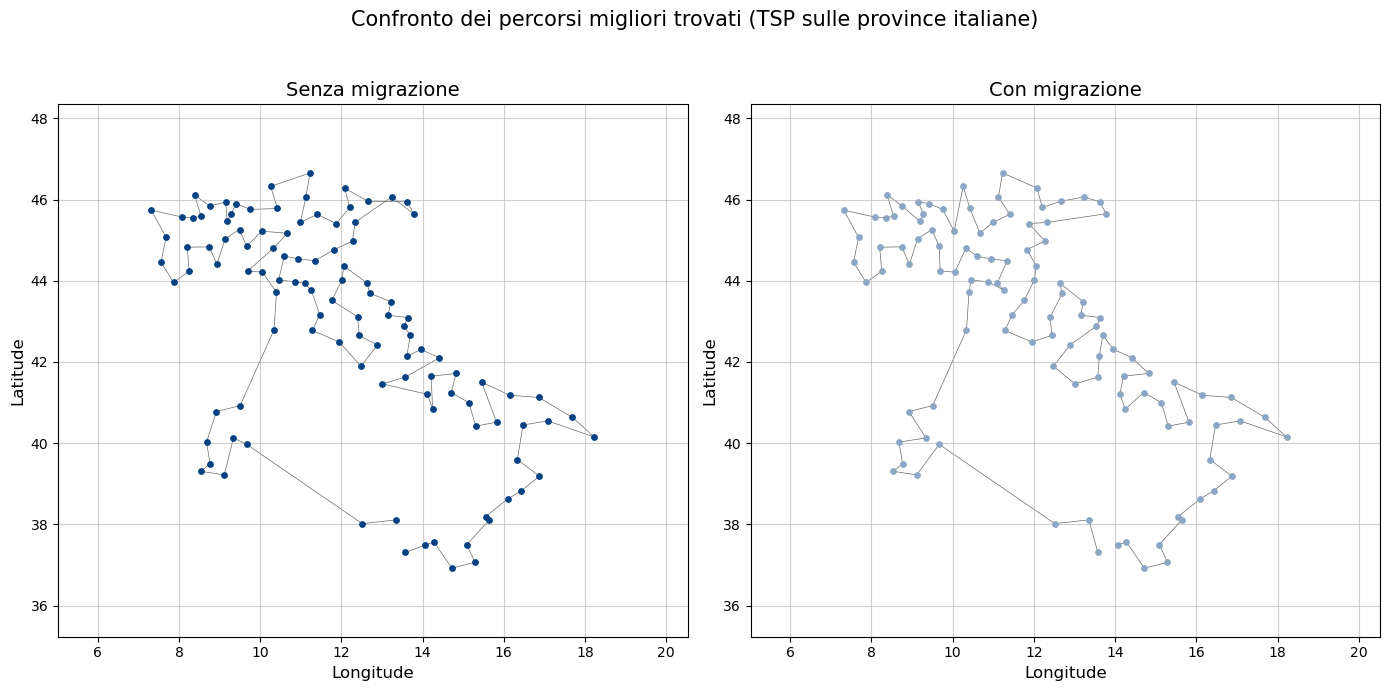

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def load_coords(filename):
    coords = []
    with open(filename, "r") as f:
        for line in f:
            _, x, y = map(float, line.strip().split())
            coords.append((x, y))
    return zip(*coords)

x_nomig, y_nomig = load_coords("best_overall_path_nomig.dat")
x_mig, y_mig = load_coords("best_overall_path_mig.dat")

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].plot(x_nomig, y_nomig, color='dimgray', linewidth=0.5, zorder=1)
axs[0].scatter(x_nomig, y_nomig, s=15, color='xkcd:darkish blue', zorder=2)
axs[0].set_title("Senza migrazione", fontsize=14)
axs[0].set_xlabel("Longitude", fontsize=12)
axs[0].set_ylabel("Latitude", fontsize=12)
axs[0].axis('equal')
axs[0].grid(True, alpha = 0.6)

axs[1].plot(x_mig, y_mig, color='dimgray', linewidth=0.5, zorder=1)
axs[1].scatter(x_mig, y_mig, s=15, color=(0.55, 0.65, 0.77), zorder=2)
axs[1].set_title("Con migrazione", fontsize=14)
axs[1].set_xlabel("Longitude", fontsize=12)
axs[1].set_ylabel("Latitude", fontsize=12)
axs[1].axis('equal')
axs[1].grid(True, alpha = 0.6)

plt.suptitle("Confronto dei percorsi migliori trovati (TSP sulle province italiane)", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Durante il processo evolututivo, per ogni generazione, viene registrata la distanza media relativa alla metà migliore della popolazione.
Di seguito si riportano tali risultati, in funzione della generazione, in modo da confrontare i risultati ottenuti su ciascun processo in assenza e in presenza di migrazioni.

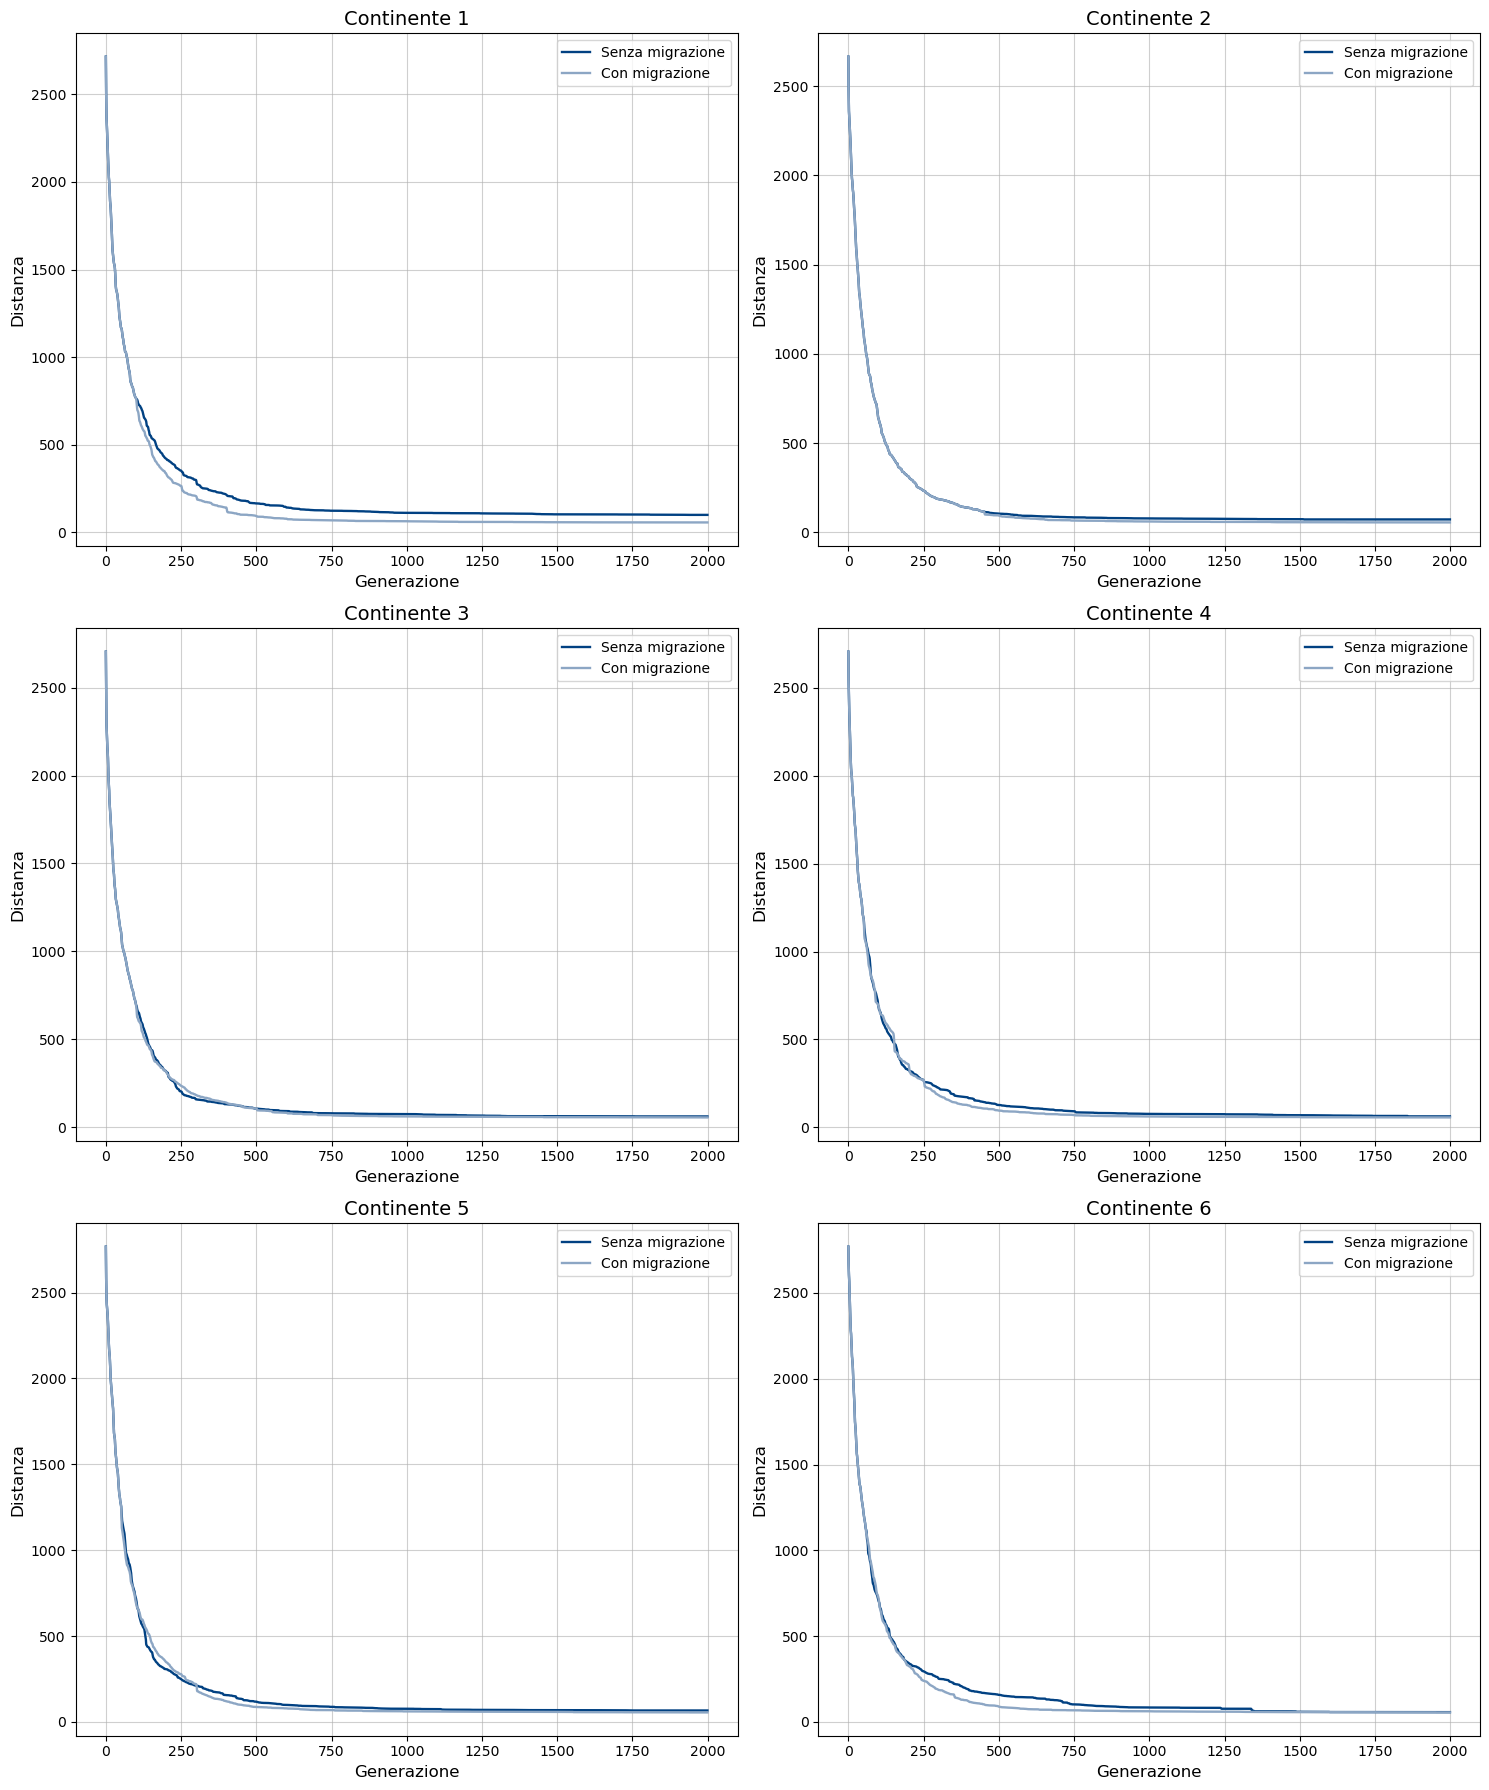

In [17]:
name_nomig = ["mean_distance_rank_0_nomig.dat", "mean_distance_rank_1_nomig.dat", "mean_distance_rank_2_nomig.dat", "mean_distance_rank_3_nomig.dat", 
        "mean_distance_rank_4_nomig.dat", "mean_distance_rank_5_nomig.dat"]

name_mig = ["mean_distance_rank_0_mig.dat", "mean_distance_rank_1_mig.dat", "mean_distance_rank_2_mig.dat", "mean_distance_rank_3_mig.dat", 
        "mean_distance_rank_4_mig.dat", "mean_distance_rank_5_mig.dat"]

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]

    data_nomig = np.loadtxt(name_nomig[i])
    data_mig = np.loadtxt(name_mig[i])

    generations = np.arange(len(data_nomig))

    ax.plot(generations, data_nomig, color="xkcd:darkish blue", label="Senza migrazione", linewidth=1.7)
    ax.plot(generations, data_mig, color=(0.55, 0.65, 0.77), label="Con migrazione", linewidth=1.7)

    ax.set_title(f"Continente {i + 1}", fontsize=14)
    ax.set_xlabel("Generazione", fontsize=12)
    ax.set_ylabel("Distanza", fontsize=12)
    ax.grid(True, alpha=0.6)
    ax.legend()
    
plt.tight_layout()
plt.show()


I risultati ottenuti confermano che l’approccio parallelo con migrazione tra popolazioni consente di ottenere prestazioni superiori rispetto alla versione senza migrazione: si raggiungono distanze ottimali inferiori in un numero di generazioni complessivamente minore. Questo si osserva perchè:
1. si evita che il singolo processo rimanga bloccato in optima locali;
2. se un processo individua una soluzione molto buona, la può trasmettere agli altri, favorendo l'esplorazione di regioni promettenti dello spazio delle soluzioni.